In [1]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
from nltk.tokenize import word_tokenize, RegexpTokenizer
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import math

In [4]:
tokenizer = RegexpTokenizer(r'\w+')

In [7]:
doc1 = 'Machine learning and data science are fields that utilize data to generate insights, build predictive models, and automate processes'
doc1 = tokenizer.tokenize(doc1)
doc2 = 'Data mining techniques are essential in data science and analytics for discovering patterns and relationships in large datasets'
doc2 = tokenizer.tokenize(doc2)
doc3 = 'Natural language processing is a subfield of artificial intelligence that focuses on understanding and generating human language.'
doc3 = tokenizer.tokenize(doc3)
doc4 = 'Information retrieval deals with the search and extraction of relevant information from large collections, often using machine learning techniques.'
doc4 = tokenizer.tokenize(doc4)
doc5 = 'Predictive analytics in data science often leverages machine learning and data mining to forecast future trends based on historical data'
doc5 = tokenizer.tokenize(doc5)


In [8]:
bg_doc = 'Artificial intelligence (AI) is transforming industries worldwide at an astonishing pace, automating complex tasks and driving groundbreaking innovations. Thanks to these advancements, AI has become a cornerstone in fields like healthcare, finance, and transportation. By leveraging its capacity to analyze vast amounts of data, AI systems can identify intricate patterns and deliver valuable insights in ways that traditional methods simply cannot match.Within the broader AI domain lies machine learning, a specialized subset that enables systems to learn from data, refining predictions, and improving decision-making processes. As AI technology advances, the significance of ethical considerations become increasingly important, with discussions on transparency, fairness, and accountability. Debates on transparency, fairness, and accountability highlight the importance of ensuring AI-driven outcomes benefit society at large. Moreover, there is an ongoing conversation regarding whether the knowledge gained by AI can—or cannot—be fully grasped by humans, given the  complexity and scale of certain computational tasks.'
bg_doc += 'Meanwhile, machine learning and data science complement each other in their reliance on comprehensive datasets to generate insights, construct predictive models, and streamline various processes. Machine learning and data science are fields that utilize data to generate insights, build predictive models, and automate processes. Data mining techniques form a critical part of these workflows, helping data scientists discover patterns and relationships that might otherwise remain hidden. Across multiple scientific disciplines, these same data science methods are universally applicable, underscoring their versatility and value in both academic research and real-world industry settings. Data mining techniques are essential in data science and analytics for discovering patterns and relationships in large datasets.'
bg_doc += 'One of the most prominent subfields of AI is natural language processing (NLP), which focuses on understanding and producing human language. From sentiment analysis in social media to automated customer service chatbots, NLP bridges the communication gap between humans and machines. In parallel, information retrieval concentrates on searching through and extracting relevant content from large collections—often powered by machine learning algorithms to boost accuracy and speed. Information retrieval deals with the search and extraction of relevant information from large collections, often using machine learning techniques. Natural language processing is a subfield of artificial intelligence that focuses on understanding and generating human language.Lastly, predictive analytics in data science taps into both machine learning and data mining to forecast emerging trends by drawing on historical data. This foresight helps organizations plan strategically, anticipate market changes, and optimize operations. Taken together, these technologies highlight the dynamic synergy between AI, machine learning, and data science. They illustrate not only the immense capabilities of computational systems but also reaffirm that data science techniques can be fruitfully applied to any field of science, driving progress and innovation across the globe. Predictive analytics in data science often leverages machine learning and data mining to forecast future trends based on historical data. What AI learns can or cannot be learned or used by human which is useful in any field of science'
bg_corpus = tokenizer.tokenize(bg_doc)

In [12]:
def calculate_probabilities(corpus):
    word_counts = Counter(corpus)
    total_words = sum(word_counts.values())
    
    background_prob = {word: count / total_words for word, count in word_counts.items()}
    return background_prob

In [47]:
background_prob = calculate_probabilities(bg_corpus)
doc1_ml = calculate_probabilities(doc1)
doc2_ml = calculate_probabilities(doc2)
doc3_ml = calculate_probabilities(doc3)
doc4_ml = calculate_probabilities(doc4)
doc5_ml = calculate_probabilities(doc5)

doc_mls = [doc1_ml, doc2_ml, doc3_ml, doc4_ml, doc5_ml]

In [51]:
def jm_smoothing(query, doc_ml, background_prob, lambdaa=0.7):
    doc_prob = 1
    for word in query:
        ml_prob = doc_ml.get(word, 0)
        bg_prob = background_prob.get(word, 0)
      
        prob = (1-lambdaa) * ml_prob + lambdaa * bg_prob
        doc_prob *= prob if prob > 0 else float('-inf')
        
    return doc_prob

In [49]:
verbose_query = 'What are the techniques used in data science and machine learning'
verbose_query = tokenizer.tokenize(verbose_query)
keyword_query = 'data science techniques'
keyword_query = tokenizer.tokenize(keyword_query)

In [74]:
verbose_retrieved = []
query_retrieved = []
related = [1, 3, 4]
verbose_precisions = []
query_precisions = []
lambda_range = np.arange(0, 1, 0.01)
for x in lambda_range:
    verbose_retrieved = []
    query_retrieved = []
    for id, doc_ml in enumerate(doc_mls):
        prob = jm_smoothing(verbose_query, doc_ml, background_prob, lambdaa=x)
        if prob >= 2e-22:
            verbose_retrieved.append(id+1)
        prob = jm_smoothing(keyword_query, doc_ml, background_prob, lambdaa=x)
        if prob >= 2e-7:
            query_retrieved.append(id+1)

    verbose_precision = sum(1 for item in related if item in verbose_retrieved)/5
    query_precision = sum(1 for item in related if item in query_retrieved)/5
    verbose_precisions.append(verbose_precision)
    query_precisions.append(query_precision)

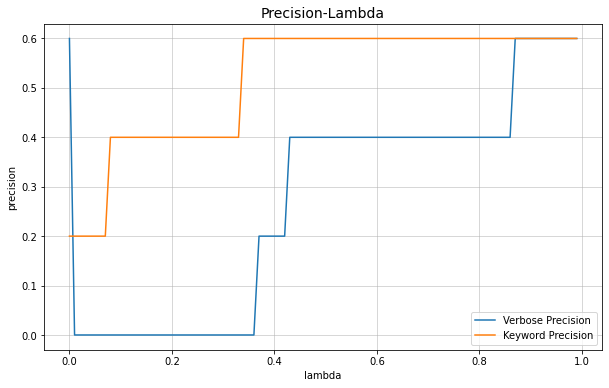

In [75]:
plt.figure(figsize=(10, 6))
plt.plot(lambda_range, verbose_precisions, label="Verbose Precision")    
plt.plot(lambda_range, query_precisions, label="Keyword Precision")    
plt.title("Precision-Lambda", fontsize=14)
plt.xlabel("lambda")
plt.ylabel("precision")
plt.grid(True, which="both", linewidth=0.5)
plt.legend()
plt.show()